In [7]:
import pandas as pd

df = pd.read_csv("Wholesale customers data.csv")
print(df.head())
print(df.describe())
print(df.info())
print(df['Channel'].value_counts())
print(df['Region'].value_counts())

print(df.columns)

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.5000

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')


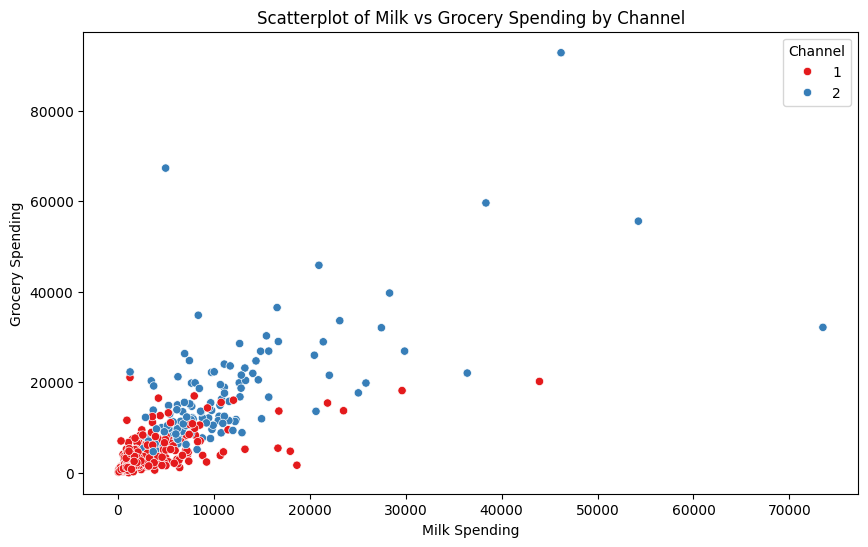

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Wholesale customers data.csv")

print(df.columns)

# Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel', palette='Set1')
plt.title('Scatterplot of Milk vs Grocery Spending by Channel')
plt.xlabel('Milk Spending')
plt.ylabel('Grocery Spending')
plt.legend(title='Channel')
plt.show()

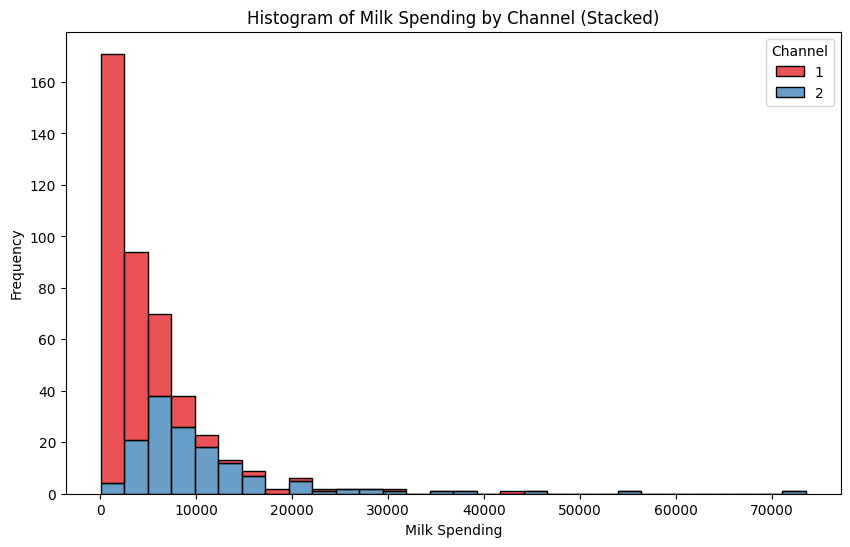

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Wholesale customers data.csv")

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Milk', hue='Channel', multiple='stack', palette='Set1', bins=30)
plt.title('Histogram of Milk Spending by Channel (Stacked)')
plt.xlabel('Milk Spending')
plt.ylabel('Frequency')
plt.show()

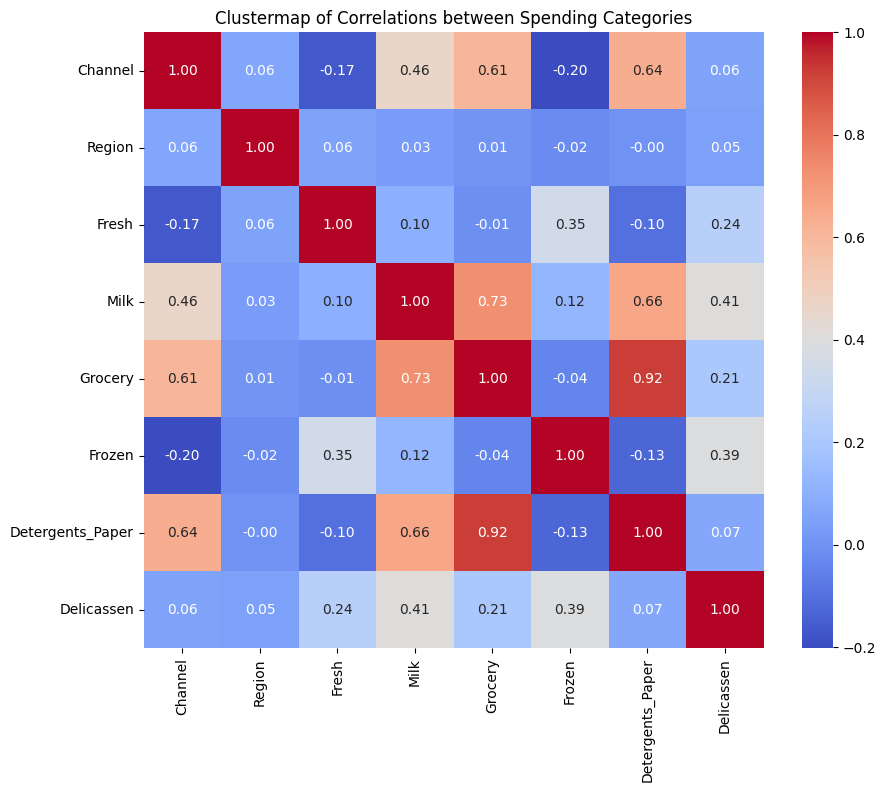

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Wholesale customers data.csv")

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Clustermap of Correlations between Spending Categories')
plt.show()

<Figure size 1200x800 with 0 Axes>

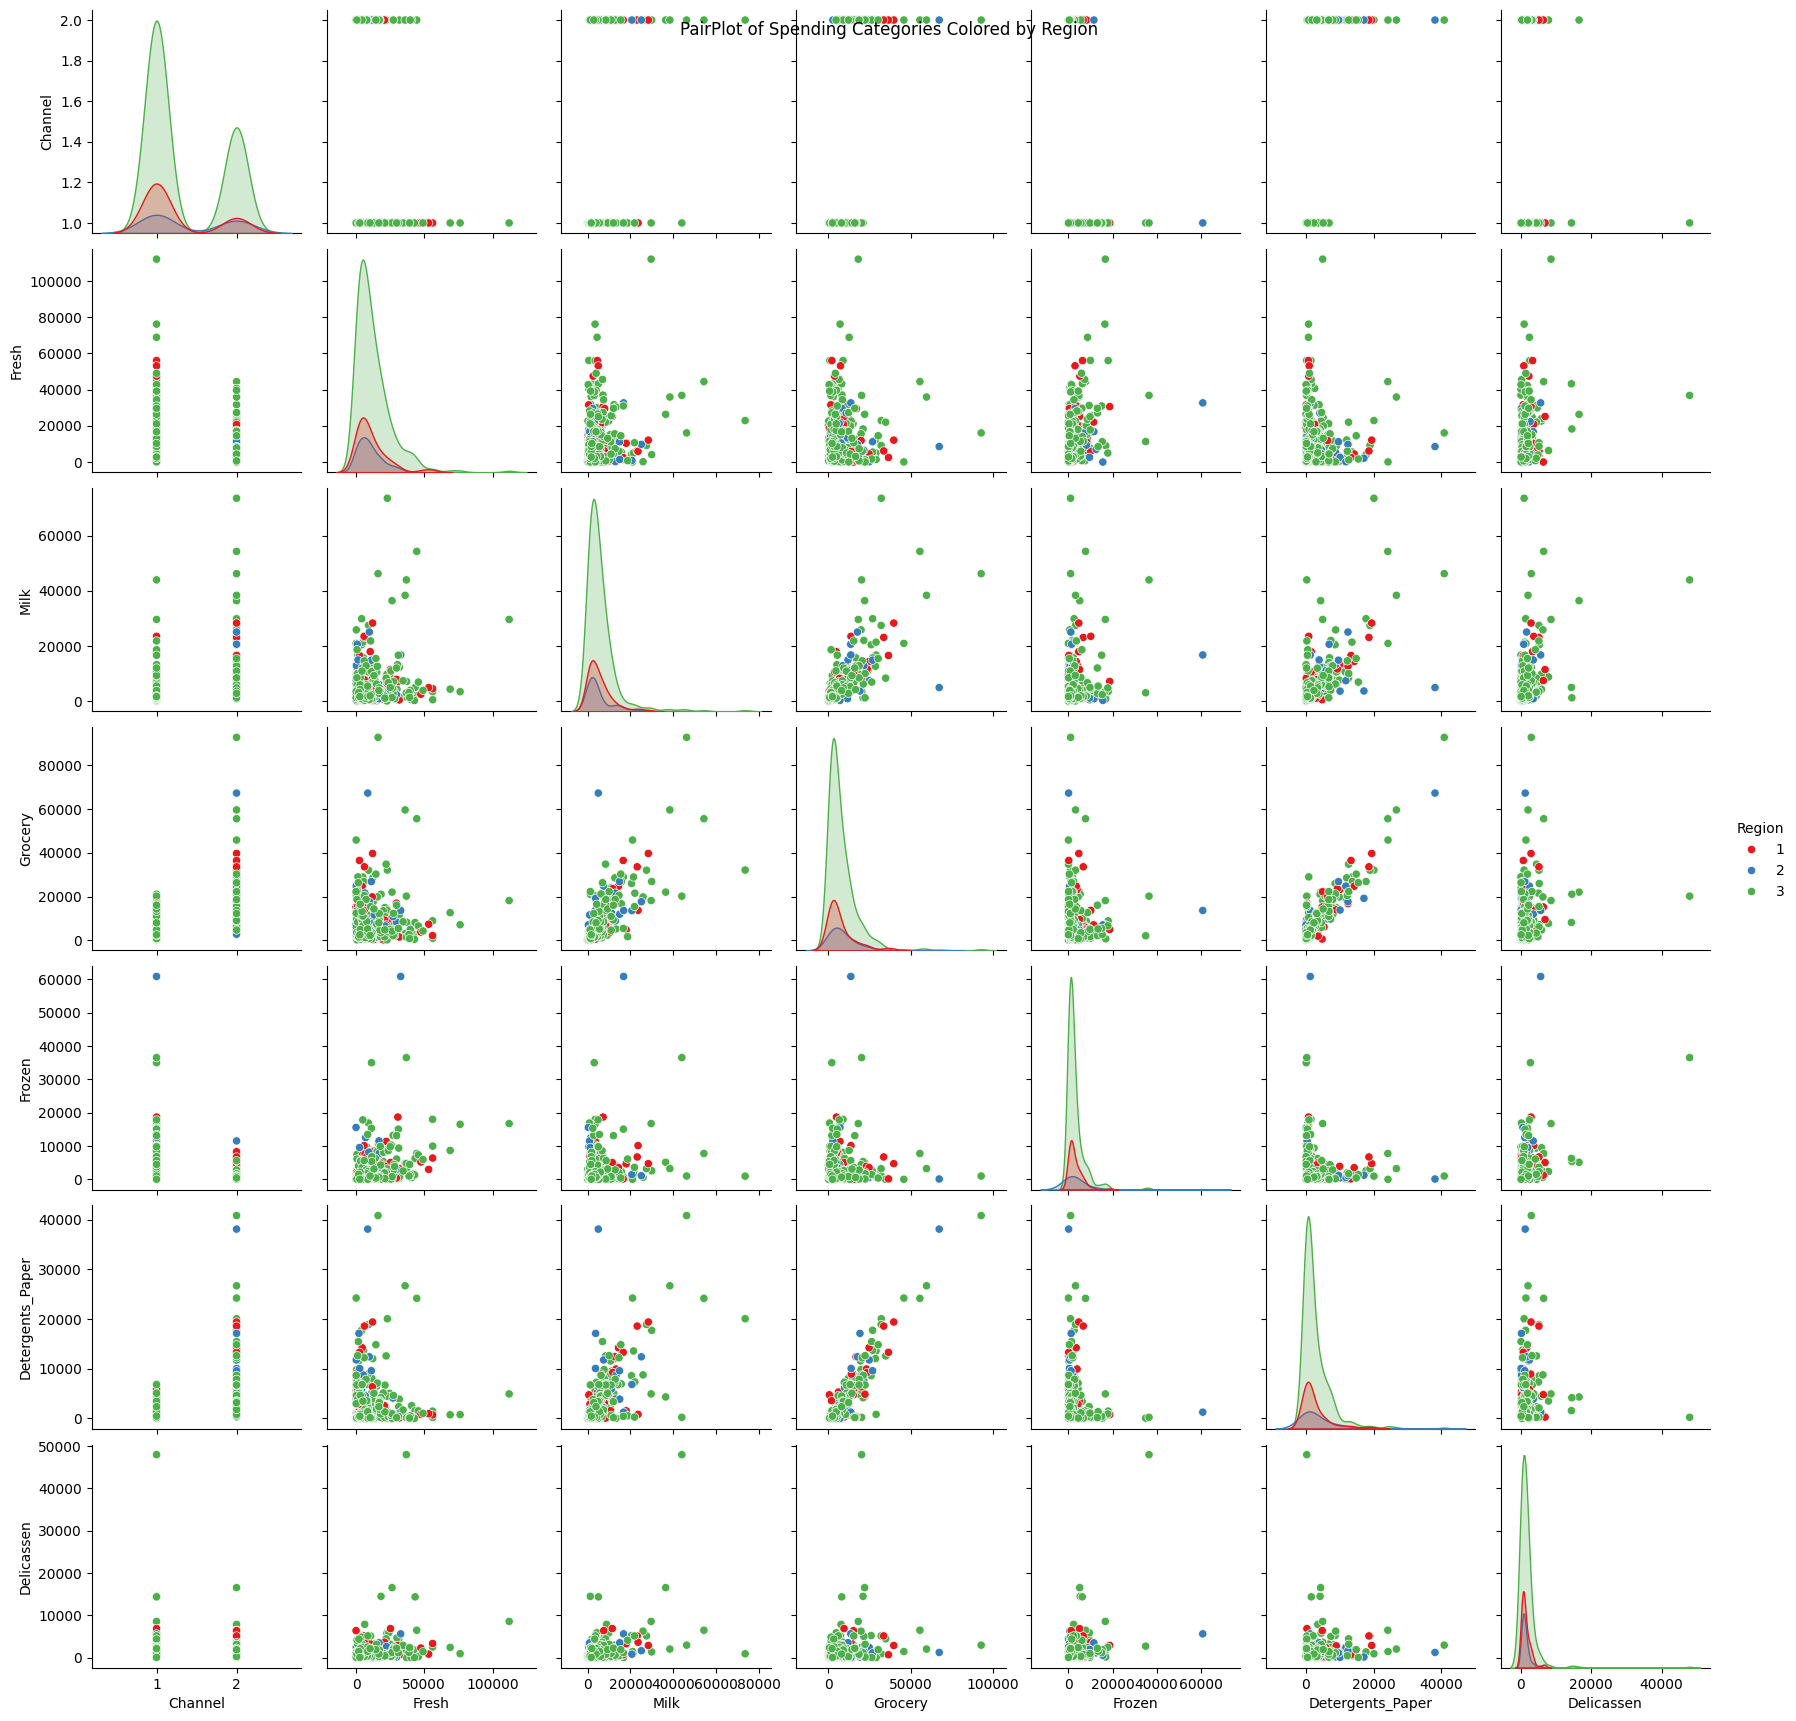

In [11]:
df = pd.read_csv("Wholesale customers data.csv")

# Create PairPlot
plt.figure(figsize=(12, 8))
sns.pairplot(data=df, hue='Region', palette='Set1')
plt.suptitle('PairPlot of Spending Categories Colored by Region')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("Wholesale customers data.csv")
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_to_scale = df[numerical_columns]

scaler = StandardScaler()

scaled_data = scaler.fit_transform(data_to_scale)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

print(scaled_df.head())

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.052933  0.523568 -0.041115 -0.589367         -0.043569   -0.066339
1 -0.391302  0.544458  0.170318 -0.270136          0.086407    0.089151
2 -0.447029  0.408538 -0.028157 -0.137536          0.133232    2.243293
3  0.100111 -0.624020 -0.392977  0.687144         -0.498588    0.093411
4  0.840239 -0.052396 -0.079356  0.173859         -0.231918    1.299347


Epsilon: 0.001, Outlier Percentage: 100.00%
Epsilon: 0.062, Outlier Percentage: 100.00%
Epsilon: 0.123, Outlier Percentage: 100.00%
Epsilon: 0.185, Outlier Percentage: 100.00%
Epsilon: 0.246, Outlier Percentage: 95.45%
Epsilon: 0.307, Outlier Percentage: 83.41%
Epsilon: 0.368, Outlier Percentage: 72.27%
Epsilon: 0.429, Outlier Percentage: 66.14%
Epsilon: 0.491, Outlier Percentage: 59.09%
Epsilon: 0.552, Outlier Percentage: 46.59%
Epsilon: 0.613, Outlier Percentage: 40.45%
Epsilon: 0.674, Outlier Percentage: 31.82%
Epsilon: 0.735, Outlier Percentage: 28.18%
Epsilon: 0.797, Outlier Percentage: 24.55%
Epsilon: 0.858, Outlier Percentage: 20.23%
Epsilon: 0.919, Outlier Percentage: 15.68%
Epsilon: 0.980, Outlier Percentage: 13.86%
Epsilon: 1.041, Outlier Percentage: 12.73%
Epsilon: 1.103, Outlier Percentage: 11.14%
Epsilon: 1.164, Outlier Percentage: 10.68%
Epsilon: 1.225, Outlier Percentage: 9.55%
Epsilon: 1.286, Outlier Percentage: 7.95%
Epsilon: 1.347, Outlier Percentage: 7.50%
Epsilon: 1

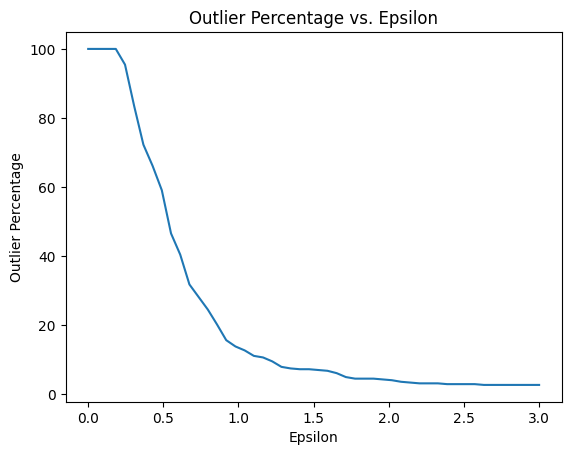

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import DBSCAN

df = pd.read_csv("Wholesale customers data.csv")

numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

eps_range = np.linspace(0.001, 3, 50)

min_samples = 2 * len(numerical_columns)

outlier_percentages = []

for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    clusters = dbscan.fit_predict(scaled_data)
    outlier_percentage = (clusters == -1).sum() / len(clusters) * 100
    outlier_percentages.append(outlier_percentage)

    print(f"Epsilon: {eps:.3f}, Outlier Percentage: {outlier_percentage:.2f}%")

import matplotlib.pyplot as plt
plt.plot(eps_range, outlier_percentages)
plt.xlabel('Epsilon')
plt.ylabel('Outlier Percentage')
plt.title('Outlier Percentage vs. Epsilon')
plt.show()

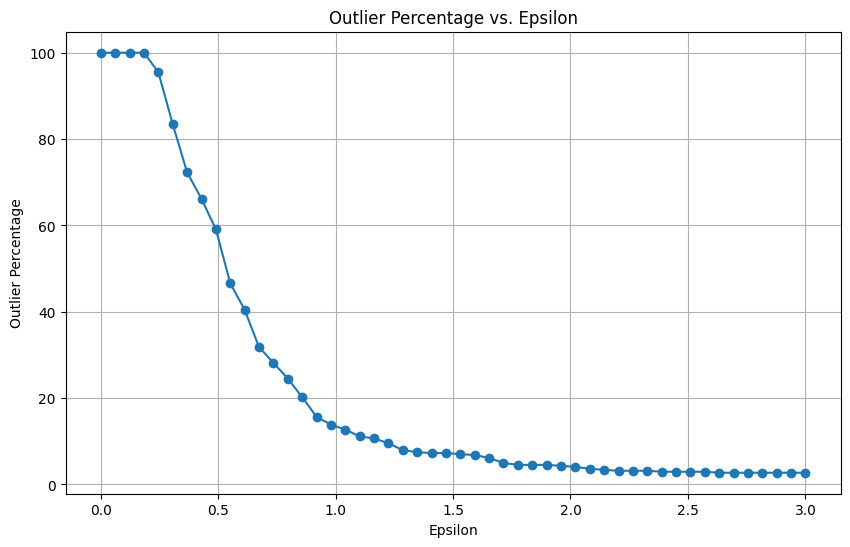

In [19]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the range of epsilon values
eps_range = np.linspace(0.001, 3, 50)

# Calculate min_samples
min_samples = 2 * len(numerical_columns)

# Initialize lists to store outlier percentages
outlier_percentages = []

# Loop over epsilon values
for eps in eps_range:
    # Create DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    
    # Fit the model and predict clusters
    clusters = dbscan.fit_predict(scaled_data)
    
    # Calculate the percentage of points classified as outliers
    outlier_percentage = (clusters == -1).sum() / len(clusters) * 100
    outlier_percentages.append(outlier_percentage)

# Plot the outlier percentages
plt.figure(figsize=(10, 6))
plt.plot(eps_range, outlier_percentages, marker='o', linestyle='-')
plt.xlabel('Epsilon')
plt.ylabel('Outlier Percentage')
plt.title('Outlier Percentage vs. Epsilon')
plt.grid(True)
plt.show()

In [20]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the epsilon value
eps = 2

# Calculate min_samples
min_samples = 2 * len(numerical_columns)

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Get the number of clusters (excluding noise)
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print(f"Number of clusters: {num_clusters}")

Number of clusters: 1


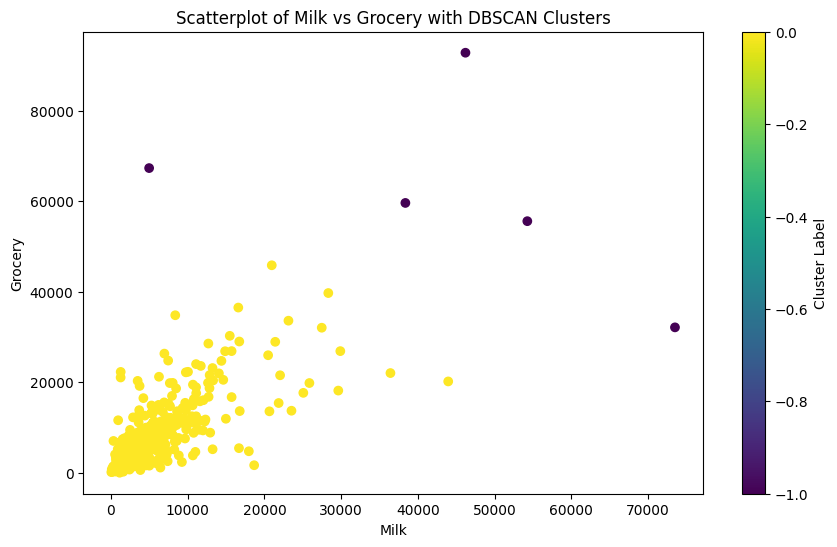

In [21]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Milk', 'Grocery']
data_for_clustering = df[numerical_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the epsilon value and min_samples
eps = 2
min_samples = 2

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Plot the scatterplot with colored clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Grocery'], c=clusters, cmap='viridis')
plt.title('Scatterplot of Milk vs Grocery with DBSCAN Clusters')
plt.xlabel('Milk')
plt.ylabel('Grocery')
plt.colorbar(label='Cluster Label')
plt.show()

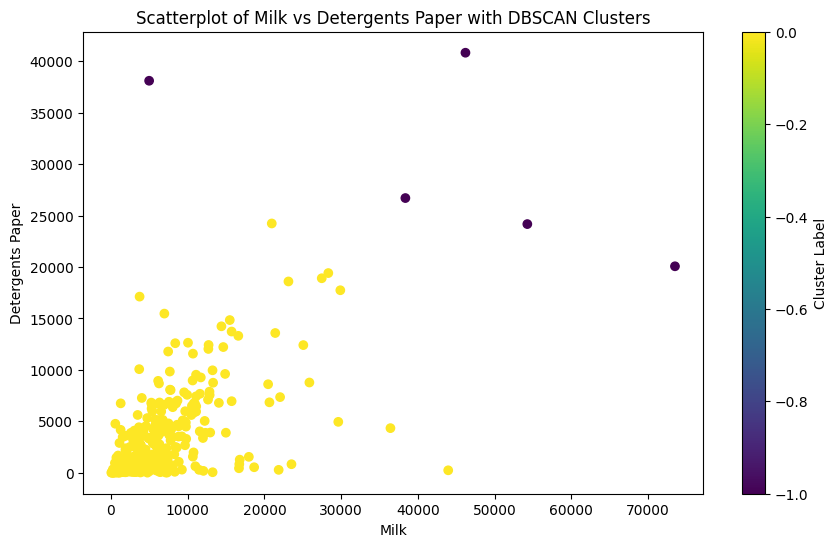

In [22]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Milk', 'Detergents_Paper']
data_for_clustering = df[numerical_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the epsilon value and min_samples
eps = 2
min_samples = 2

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Plot the scatterplot with colored clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Milk'], df['Detergents_Paper'], c=clusters, cmap='viridis')
plt.title('Scatterplot of Milk vs Detergents Paper with DBSCAN Clusters')
plt.xlabel('Milk')
plt.ylabel('Detergents Paper')
plt.colorbar(label='Cluster Label')
plt.show()

In [23]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the epsilon value and min_samples
eps = 2
min_samples = 2

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Add the 'Labels' column to the original DataFrame
df['Labels'] = clusters

# Display the DataFrame with the new column
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Labels  
0        1338       0  
1        1776       0  
2        7844       0  
3        1788       0  
4        5185       0  


In [24]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the epsilon value and min_samples
eps = 2
min_samples = 2

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Add the 'Labels' column to the original DataFrame
df['Labels'] = clusters

# Calculate the statistical mean for each cluster and outliers
cluster_means = df.groupby('Labels')[numerical_columns].mean()
outliers_mean = df[df['Labels'] == -1][numerical_columns].mean()

# Print the results
print("Mean spending for each cluster:")
print(cluster_means)
print("\nMean spending for outliers:")
print(outliers_mean)

Mean spending for each cluster:
               Fresh          Milk       Grocery        Frozen  \
Labels                                                           
-1      31466.000000  28802.076923  35259.461538  13785.538462   
 0      11407.665105   5095.854801   7119.880562   2745.756440   

        Detergents_Paper   Delicassen  
Labels                                 
-1          14670.846154  9624.076923  
 0           2522.566745  1278.290398  

Mean spending for outliers:
Fresh               31466.000000
Milk                28802.076923
Grocery             35259.461538
Frozen              13785.538462
Detergents_Paper    14670.846154
Delicassen           9624.076923
dtype: float64


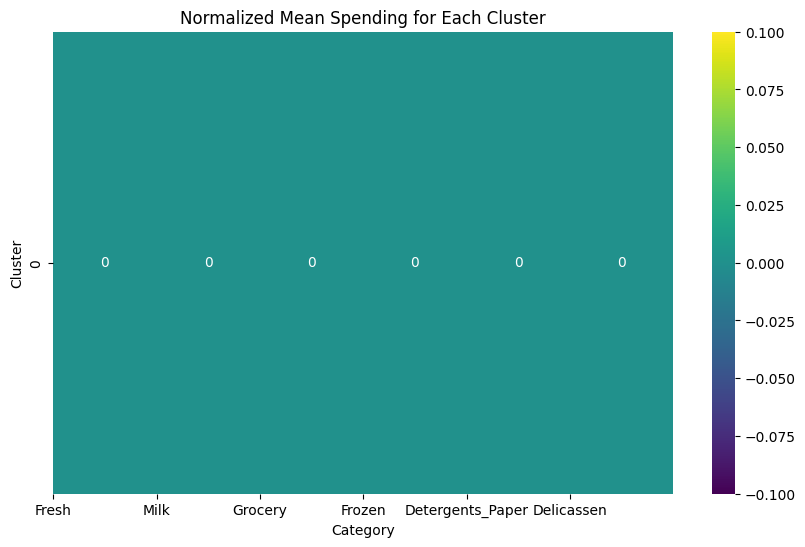

In [25]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas DataFrame
df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the epsilon value and min_samples
eps = 2
min_samples = 2

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Add the 'Labels' column to the original DataFrame
df['Labels'] = clusters

# Calculate the statistical mean for each cluster and outliers
cluster_means = df.groupby('Labels')[numerical_columns].mean()
outliers_mean = df[df['Labels'] == -1][numerical_columns].mean()

# Normalize the DataFrame using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cluster_means)

# Create a heatmap of the normalized values
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data, annot=True, cmap='viridis')
plt.title('Normalized Mean Spending for Each Cluster')
plt.xlabel('Category')
plt.ylabel('Cluster')
plt.xticks(ticks=range(len(numerical_columns)), labels=numerical_columns)
plt.show()

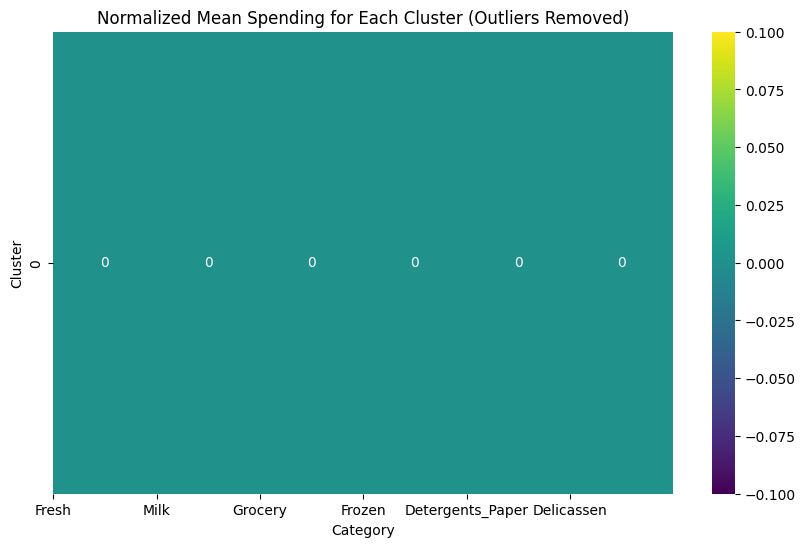

In [26]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

# Set the epsilon value and min_samples
eps = 2
min_samples = 2

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(scaled_data)

# Add the 'Labels' column to the original DataFrame
df['Labels'] = clusters

# Filter out the outliers
filtered_df = df[df['Labels'] != -1]

# Calculate the statistical mean for each cluster
cluster_means = filtered_df.groupby('Labels')[numerical_columns].mean()

# Normalize the DataFrame using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cluster_means)

# Create a heatmap of the normalized values
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_data, annot=True, cmap='viridis')
plt.title('Normalized Mean Spending for Each Cluster (Outliers Removed)')
plt.xlabel('Category')
plt.ylabel('Cluster')
plt.xticks(ticks=range(len(numerical_columns)), labels=numerical_columns)
plt.show()

In [27]:
import pandas as pd
from sklearn.cluster import DBSCAN
from scipy.stats import mode

df = pd.read_csv("Wholesale customers data.csv")

# Select only the numerical columns for clustering
numerical_columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
data_for_clustering = df[numerical_columns]

# Set the epsilon value and min_samples
eps = 2
min_samples = 2

# Create DBSCAN model
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the model and predict clusters
clusters = dbscan.fit_predict(data_for_clustering)

# Add the 'Labels' column to the original DataFrame
df['Labels'] = clusters

# Filter out the outliers
filtered_df = df[df['Labels'] != -1]

# Calculate the mode for each spending category within each cluster
cluster_modes = filtered_df.groupby('Labels')[numerical_columns].agg(lambda x: mode(x)[0])

# Calculate the absolute difference between the modes of each spending category
absolute_diff = cluster_modes.diff().abs().iloc[1:]

# Find the spending category with the maximum absolute difference
if not absolute_diff.empty:
    category_with_max_diff = absolute_diff.idxmax().max()
    print(f"The spending category with the most different modes between the two clusters is: {category_with_max_diff}")
else:
    print("insufficient data.")

insufficient data.
